# Coding Test (CSV Parsing & Insights Analysis)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Small CSV

In [2]:
df = pd.read_csv("customers-100000.csv")

In [3]:
df.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/
1,2,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/
2,3,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/
3,4,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/
4,5,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/


In [4]:
df.shape

(100000, 12)

In [5]:
df.columns

Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website'],
      dtype='object')

In [6]:
df.nunique()

Index                100000
Customer Id          100000
First Name              690
Last Name              1000
Company               71994
City                  49154
Country                 243
Phone 1              100000
Phone 2              100000
Email                 99995
Subscription Date       880
Website               50471
dtype: int64

## Small CSV EDA

### Countries

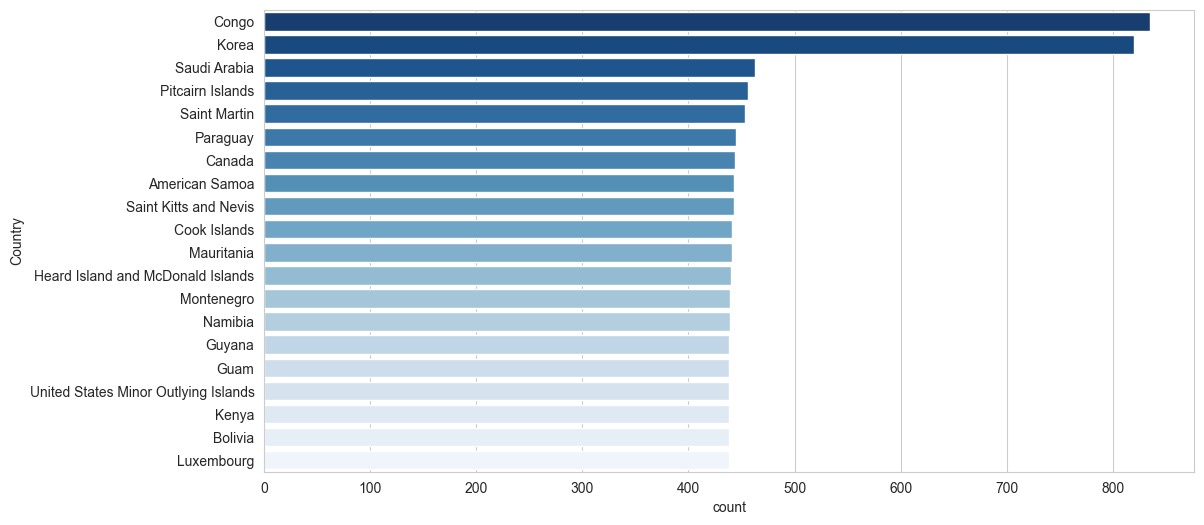

In [7]:
df_country_count = df['Country'].value_counts().to_frame()

plt.figure(figsize=(12,6))

sns.barplot(
    data=df_country_count.nlargest(20, "count"),
    x="count",
    y="Country",
    palette="Blues_r",
    orient='h'
)

# plt.xlabel("Country")
# plt.ylabel("Count")
plt.xticks(rotation=0)

plt.show()

### Cities

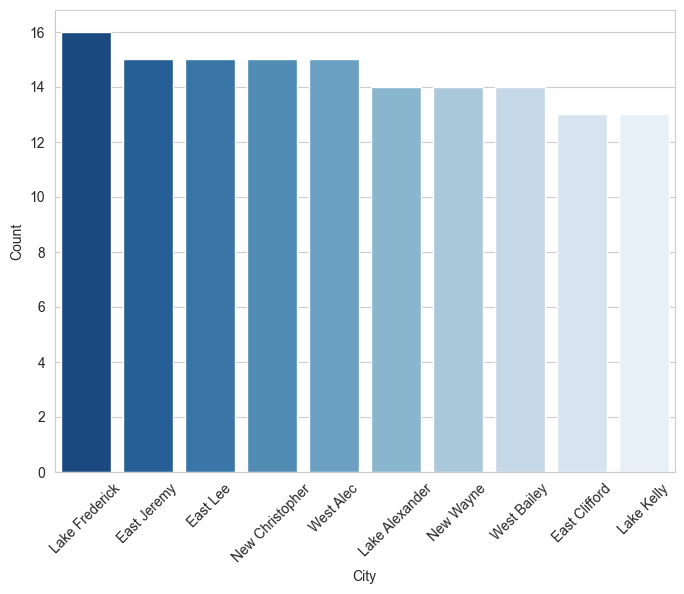

In [16]:
df_city_count = df.groupby('City', as_index=False).count()

plt.figure(figsize=(8,6))

sns.barplot(
    data=df_city_count.nlargest(10, "Index"),
    x="City",
    y="Index",
    palette="Blues_r"
)

plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

## Large CSV (with Pandas Chunksize)

In [9]:
chunksize = 10**4
df_chunks = pd.read_csv("customers-2000000.csv", chunksize=chunksize)

### Sample use case: Process country count for each chunk, then store the result

In [10]:
def process_country_count(chunk, country_count_data):
    country_counts = chunk["Country"].value_counts()
    for country, count in country_counts.items():
        # print(country, count)
        if country not in country_count_data:
            country_count_data[country] = 0
        country_count_data[country] += count
    return country_count_data

In [11]:
country_count_data = {}

In [12]:
for chunk in df_chunks:
    country_count_data = process_country_count(chunk, country_count_data)

In [14]:
df_country_count2 = pd.DataFrame(
    list(country_count_data.items()), columns=["Country", "count"]
)

df_country_count2["count"].sum()

2000000

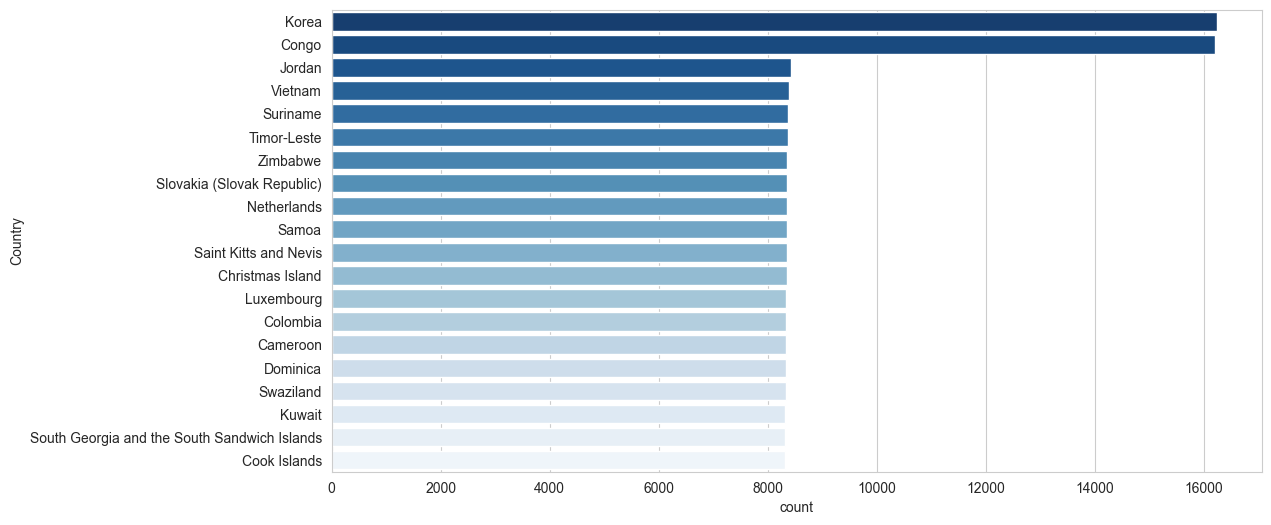

In [15]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_country_count2.nlargest(20, "count"),
    x="count",
    y="Country",
    palette="Blues_r",
    orient='h'
)

# plt.xlabel("Country")
# plt.ylabel("Count")
plt.xticks(rotation=0)

plt.show()